In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Part b functions

In [2]:
def filtered(img, sigma):
    gaussian_filter = np.zeros((img.shape[0],img.shape[1]))
    a = img.shape[0]//2
    b = img.shape[1]//2
    for x in range(-a, a):
        for y in range(-b, b):
            x1 = np.sqrt(2*np.pi*(sigma**2))
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            gaussian_filter[x+a-1, y+b-1] = x2
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    filtered_fft = img_fft*gaussian_filter
    filtered_img = np.abs(np.fft.ifft2(filtered_fft))
    
    return filtered_img

In [3]:
def lowpass_filter(img, sigma):
    img_filtered = filtered(img, sigma)
    return img_filtered

In [4]:
def highpass_filter(img, sigma):
    img_filtered = img-filtered(img, sigma)
    return img_filtered

# Part d function

In [5]:
def merge(img_1, img_2, sigma_list, name):
    plt.figure(figsize=(10,10))
    for s in range(len(sigma_list)):
        img_1_low = lowpass_filter(img_1, sigma_list[s])
        img_2_high = highpass_filter(img_2, sigma_list[s])
        merged = img_1_low+img_2_high
        plt.subplot(3,2,s+1)
        plt.imshow(merged, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    plt.savefig('F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P3/part_d/'+name+'.png')
    plt.show()

# Joe

In [6]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P3/part_a/'
img_1 = cv2.imread(path + 'joe_4_aligned.png')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_2 = cv2.imread(path + 'joe_6_aligned.png')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

In [7]:
sigma_list = [5,15,25,35,45]

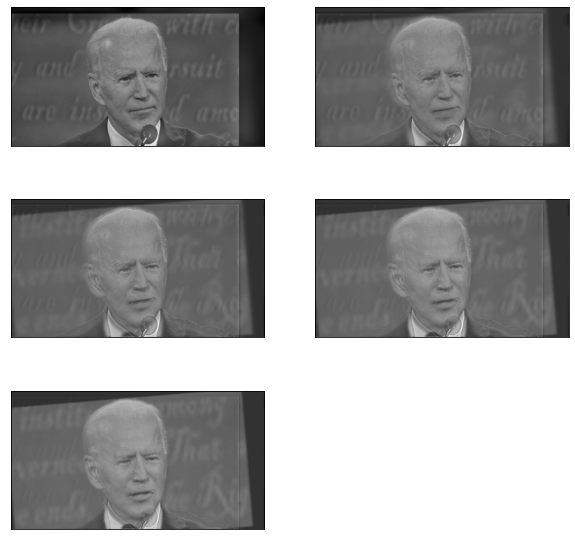

In [8]:
img_merged = merge(img_1, img_2, sigma_list, 'joe')

# Donald

In [9]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P3/part_a/'
img_1 = cv2.imread(path + 'donald_1_aligned.png')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_2 = cv2.imread(path + 'donald_6_aligned.png')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

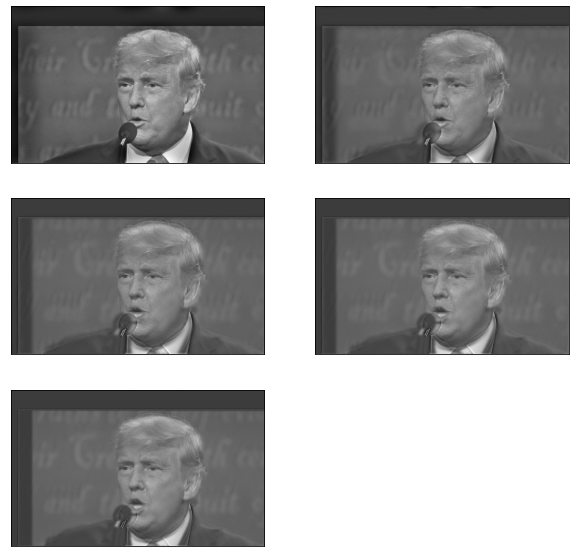

In [10]:
img_merged = merge(img_1, img_2, sigma_list, 'donald')